In [1]:
import torch

In [11]:
x = torch.randn(100,5)# only range
y = torch.randint(0,1,(100,1)).type(torch.FloatTensor) # expected float value for loss
print("x: ", x)
print("y: ",y)

x:  tensor([[ 1.5814e+00,  4.3169e-01, -1.4872e+00,  1.4579e-01,  6.6438e-01],
        [-2.8442e-01, -6.9677e-01,  1.0202e+00,  1.0794e+00, -2.7973e+00],
        [ 1.3376e+00, -3.5962e-01, -5.3178e-02,  1.7042e+00, -1.2201e-01],
        [ 1.5100e+00, -2.2534e-01, -4.1233e-02,  8.3754e-01, -8.5984e-01],
        [-9.9080e-01,  4.5026e-01, -1.1686e+00,  5.4293e-01,  4.6711e+00],
        [ 1.7641e+00, -7.2264e-01, -2.9998e-02, -1.1608e+00,  6.8859e-01],
        [ 6.2921e-01, -2.5652e+00,  2.0532e-01, -1.4280e+00,  4.9103e-01],
        [ 6.3570e-01, -4.6786e-02, -4.4019e-01,  2.0421e-01, -1.6103e+00],
        [-8.3272e-01,  1.8774e+00,  2.1568e-02, -7.7723e-01,  1.4161e+00],
        [-1.4248e+00,  5.0094e-01,  7.5629e-01, -3.2772e-01,  1.6813e+00],
        [ 5.9905e-01, -5.9265e-02, -2.0363e-01, -7.2852e-03,  5.0793e-01],
        [ 5.6010e-01,  1.8244e-01, -6.4638e-01,  1.3158e+00, -2.6807e-01],
        [ 5.4544e-01, -9.2414e-01,  1.1168e+00, -1.2215e-01, -1.1024e+00],
        [-9.3122e-01,

In [4]:
# Define the architecture of the model and store it in a variable named model. Remember to create a single-layer model.

# imports
import torch.nn as nn

# Input dimension is 5 (as per the input tensor x) and output dimension is 1 (as per the target tensor y)
input_dim = 5
output_dim = 1

# Create the model using nn.Linear( used to map features to output features thru linear transformations; creating an architecture)
model = nn.Linear(input_dim, output_dim) # takes dimensions as input

# Print the model architecture
print(model)

Linear(in_features=5, out_features=1, bias=True)


In [5]:
# Define the loss function to be used. Use the Mean Square Error loss function.

# Define the Mean Squared Error loss function
loss_function = nn.MSELoss()

# Print the loss function
print(loss_function)


MSELoss()


In [6]:
# Define the optimizer of your model. Use the Adam optimizer.

import torch.optim as optim

# Define the Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), 0.001)
 
# Print the optimizer
print(optimizer)


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [18]:
# Run the optimization for 100 iterations. In each iteration, print and save the loss value.

itr = 100 # number of iterations

# List to store loss values
losses = []

for epoch in range(itr):
    # Forward pass
    outputs = model(x)
    
    # Compute loss
    loss = loss_function(outputs, y)
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print and save the loss value
    print(f"Iteration {epoch + 1}/{itr}, Loss: {loss.item()}")
    losses.append(loss.item())

Iteration 1/100, Loss: 0.18000862002372742
Iteration 2/100, Loss: 0.17859554290771484
Iteration 3/100, Loss: 0.17719165980815887
Iteration 4/100, Loss: 0.17579689621925354
Iteration 5/100, Loss: 0.17441116273403168
Iteration 6/100, Loss: 0.17303451895713806
Iteration 7/100, Loss: 0.17166683077812195
Iteration 8/100, Loss: 0.17030811309814453
Iteration 9/100, Loss: 0.16895830631256104
Iteration 10/100, Loss: 0.16761738061904907
Iteration 11/100, Loss: 0.16628529131412506
Iteration 12/100, Loss: 0.1649620085954666
Iteration 13/100, Loss: 0.16364750266075134
Iteration 14/100, Loss: 0.16234172880649567
Iteration 15/100, Loss: 0.1610446572303772
Iteration 16/100, Loss: 0.15975619852542877
Iteration 17/100, Loss: 0.15847638249397278
Iteration 18/100, Loss: 0.15720508992671967
Iteration 19/100, Loss: 0.1559423804283142
Iteration 20/100, Loss: 0.15468816459178925
Iteration 21/100, Loss: 0.1534423679113388
Iteration 22/100, Loss: 0.15220500528812408
Iteration 23/100, Loss: 0.1509760022163391
It

In [14]:
# Print the values of the final weights and bias. There should be a total of five weights (one for each feature of the input data) and one bias value:

print(model.state_dict())

OrderedDict([('weight', tensor([[ 0.1579,  0.1277, -0.0530, -0.2072, -0.2914]])), ('bias', tensor([-0.0309]))])


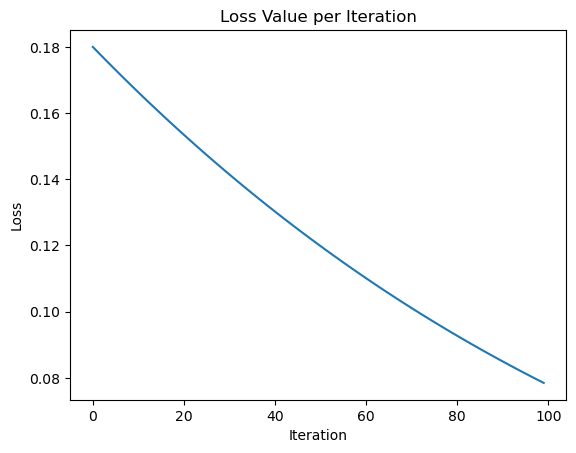

In [19]:
# Make a line plot to display the loss value for each iteration step.
import matplotlib.pyplot as plt

# Plot the loss values
plt.plot(range(itr), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Value per Iteration')
plt.show()